In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Learning Curbes

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [5]:
X, y = digits.data, digits.target

In [6]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
X.shape

(1797, 64)

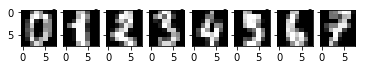

In [8]:
# Quickly see X contents
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(X.reshape(-1, 8, 8)[i], cmap='gray')

In [9]:
from sklearn.model_selection import learning_curve
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
import keras.backend as K
from keras.callbacks import EarlyStopping

C:\Users\Shin\Anaconda3\envs\tensorflow_windows\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
K.clear_session()

In [11]:
model = Sequential()
model.add(Dense(16, input_shape=(64,), activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [14]:
# store the initial random weights
initial_weights = model.get_weights()
print(initial_weights)

[array([[-0.21802709, -0.15003501, -0.15622608, ..., -0.22057647,
        -0.16801615, -0.21358019],
       [-0.00773036,  0.10495225,  0.27296728, ..., -0.01998422,
        -0.02219722, -0.13667332],
       [ 0.06875458,  0.25705177,  0.11857656, ...,  0.25223476,
        -0.07740885,  0.05404705],
       ...,
       [-0.1133799 , -0.19761056, -0.21548429, ..., -0.23784311,
         0.25012904, -0.14117564],
       [ 0.14755443,  0.09306097, -0.12879924, ...,  0.15736997,
        -0.04863317, -0.03384109],
       [ 0.19508746,  0.13300532,  0.02071884, ...,  0.05360755,
        -0.17084873,  0.17108268]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), array([[-0.09425366, -0.32914168, -0.3289668 , -0.29370472, -0.07835528,
         0.16167784, -0.23126683, -0.13225272,  0.40300822,  0.02467227],
       [ 0.3361262 ,  0.34918123,  0.11456293, -0.33908242,  0.3173328 ,
         0.01407868, -0.05369195,  0.08918113, -0.112371

In [15]:
print(y)
y_cat = to_categorical(y, 10)
print(y_cat)

[0 1 2 ... 8 9 8]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [16]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3)

In [18]:
X_train.shape

(1257, 64)

In [19]:
train_sizes = (len(X_train) * np.linspace(0.1, 0.999, 4)).astype(int)
train_sizes

array([ 125,  502,  879, 1255])

In [22]:
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ = train_test_split(X_train, y_train, train_size=train_size)
    
    model.set_weights(initial_weights)
    
    h = model.fit(X_train_frac, y_train_frac, verbose=1, epochs=300, callbacks=[EarlyStopping(monitor='loss', patience=1)])
    
    r = model.evaluate(X_train_frac, y_train_frac, verbose=0)
    
    train_scores.append(r[-1])
    
    e = model.evaluate(X_test, y_test, verbose=0)
    
    test_scores.append(e[-1])
    
    print('Done size: ', train_size)

C:\Users\Shin\Anaconda3\envs\tensorflow_windows\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Epoch 1/300
125/125 [==============================] - 0s 2ms/step - loss: 6.2817 - acc: 0.0560
Epoch 2/300
125/125 [==============================] - 0s 128us/step - loss: 5.5094 - acc: 0.0880
Epoch 3/300
125/125 [==============================] - 0s 128us/step - loss: 4.9057 - acc: 0.1440
Epoch 4/300
125/125 [==============================] - 0s 160us/step - loss: 4.4176 - acc: 0.1600
Epoch 5/300
125/125 [==============================] - 0s 160us/step - loss: 4.0407 - acc: 0.1680
Epoch 6/300
125/125 [==============================] - 0s 192us/step - loss: 3.6881 - acc: 0.1840
Epoch 7/300
125/125 [==============================] - 0s 128us/step - loss: 3.3871 - acc: 0.2080
Epoch 8/300
125/125 [==============================] - 0s 192us/step - loss: 3.1090 - acc: 0.2240
Epoch 9/300
125/125 [==============================] - 0s 128us/step - loss: 2.8598 - acc: 0.2560
Epoch 10/300
125/125 [==============================] - 0s 128us/step - loss: 2.6483 - acc: 0.2960
Epoch 11/300
125/125 

125/125 [==============================] - 0s 64us/step - loss: 0.1652 - acc: 0.9600
Epoch 84/300
125/125 [==============================] - 0s 64us/step - loss: 0.1605 - acc: 0.9600
Epoch 85/300
125/125 [==============================] - 0s 64us/step - loss: 0.1564 - acc: 0.9600
Epoch 86/300
125/125 [==============================] - 0s 64us/step - loss: 0.1523 - acc: 0.9600
Epoch 87/300
125/125 [==============================] - 0s 64us/step - loss: 0.1483 - acc: 0.9680
Epoch 88/300
125/125 [==============================] - 0s 64us/step - loss: 0.1441 - acc: 0.9680
Epoch 89/300
125/125 [==============================] - 0s 64us/step - loss: 0.1408 - acc: 0.9680
Epoch 90/300
125/125 [==============================] - 0s 64us/step - loss: 0.1378 - acc: 0.9680
Epoch 91/300
125/125 [==============================] - 0s 64us/step - loss: 0.1342 - acc: 0.9760
Epoch 92/300
125/125 [==============================] - 0s 64us/step - loss: 0.1306 - acc: 0.9840
Epoch 93/300
125/125 [===========

125/125 [==============================] - 0s 64us/step - loss: 0.0411 - acc: 0.9920
Epoch 167/300
125/125 [==============================] - 0s 32us/step - loss: 0.0407 - acc: 0.9920
Epoch 168/300
125/125 [==============================] - 0s 64us/step - loss: 0.0402 - acc: 0.9920
Epoch 169/300
125/125 [==============================] - 0s 64us/step - loss: 0.0398 - acc: 0.9920
Epoch 170/300
125/125 [==============================] - 0s 64us/step - loss: 0.0394 - acc: 0.9920
Epoch 171/300
125/125 [==============================] - 0s 64us/step - loss: 0.0390 - acc: 0.9920
Epoch 172/300
125/125 [==============================] - 0s 64us/step - loss: 0.0387 - acc: 0.9920
Epoch 173/300
125/125 [==============================] - 0s 64us/step - loss: 0.0383 - acc: 0.9920
Epoch 174/300
125/125 [==============================] - 0s 64us/step - loss: 0.0380 - acc: 0.9920
Epoch 175/300
125/125 [==============================] - 0s 64us/step - loss: 0.0377 - acc: 0.9920
Epoch 176/300
125/125 [=

125/125 [==============================] - 0s 64us/step - loss: 0.0148 - acc: 1.0000
Epoch 248/300
125/125 [==============================] - 0s 64us/step - loss: 0.0146 - acc: 1.0000
Epoch 249/300
125/125 [==============================] - 0s 64us/step - loss: 0.0145 - acc: 1.0000
Epoch 250/300
125/125 [==============================] - 0s 32us/step - loss: 0.0143 - acc: 1.0000
Epoch 251/300
125/125 [==============================] - 0s 64us/step - loss: 0.0142 - acc: 1.0000
Epoch 252/300
125/125 [==============================] - 0s 64us/step - loss: 0.0140 - acc: 1.0000
Epoch 253/300
125/125 [==============================] - 0s 64us/step - loss: 0.0138 - acc: 1.0000
Epoch 254/300
125/125 [==============================] - 0s 64us/step - loss: 0.0137 - acc: 1.0000
Epoch 255/300
125/125 [==============================] - 0s 64us/step - loss: 0.0135 - acc: 1.0000
Epoch 256/300
125/125 [==============================] - 0s 64us/step - loss: 0.0134 - acc: 1.0000
Epoch 257/300
125/125 [=

502/502 [==============================] - 0s 48us/step - loss: 0.1655 - acc: 0.9542
Epoch 29/300
502/502 [==============================] - 0s 56us/step - loss: 0.1580 - acc: 0.9622
Epoch 30/300
502/502 [==============================] - 0s 56us/step - loss: 0.1485 - acc: 0.9681
Epoch 31/300
502/502 [==============================] - 0s 48us/step - loss: 0.1464 - acc: 0.9701
Epoch 32/300
502/502 [==============================] - 0s 49us/step - loss: 0.1410 - acc: 0.9701
Epoch 33/300
502/502 [==============================] - 0s 48us/step - loss: 0.1323 - acc: 0.9761
Epoch 34/300
502/502 [==============================] - 0s 48us/step - loss: 0.1275 - acc: 0.9741
Epoch 35/300
502/502 [==============================] - 0s 48us/step - loss: 0.1243 - acc: 0.9781
Epoch 36/300
502/502 [==============================] - 0s 40us/step - loss: 0.1197 - acc: 0.9801
Epoch 37/300
502/502 [==============================] - 0s 48us/step - loss: 0.1153 - acc: 0.9821
Epoch 38/300
502/502 [===========

1255/1255 [==============================] - 0s 45us/step - loss: 0.9396 - acc: 0.6773
Epoch 5/300
1255/1255 [==============================] - 0s 45us/step - loss: 0.6550 - acc: 0.7729
Epoch 6/300
1255/1255 [==============================] - 0s 45us/step - loss: 0.4799 - acc: 0.8422
Epoch 7/300
1255/1255 [==============================] - 0s 42us/step - loss: 0.3770 - acc: 0.8725
Epoch 8/300
1255/1255 [==============================] - 0s 46us/step - loss: 0.3060 - acc: 0.8948
Epoch 9/300
1255/1255 [==============================] - 0s 41us/step - loss: 0.2648 - acc: 0.9084
Epoch 10/300
1255/1255 [==============================] - 0s 45us/step - loss: 0.2283 - acc: 0.9243
Epoch 11/300
1255/1255 [==============================] - 0s 35us/step - loss: 0.2157 - acc: 0.9275
Epoch 12/300
1255/1255 [==============================] - 0s 56us/step - loss: 0.1878 - acc: 0.9363
Epoch 13/300
1255/1255 [==============================] - 0s 52us/step - loss: 0.1704 - acc: 0.9458
Epoch 14/300
1255/

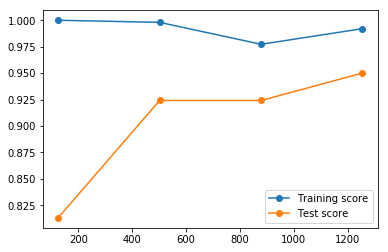

In [24]:
plt.plot(train_sizes, train_scores, 'o-', label='Training score')
plt.plot(train_sizes, test_scores, 'o-', label='Test score')
plt.legend(loc='best')